In [1]:
import numpy as np
from sklearn import metrics
import random
import scikitplot as skplt
import matplotlib.pyplot as plt

In [2]:
#!pip install ggplot

In [3]:
#!pip install pip install scikit-plot

In [32]:
a = [random.randint(0,1) for i in range(0,1000)]
b = [random.random() for i in range(0,1000)]

In [20]:
b

[0.29345811477324457,
 0.9671027087205797,
 0.34796326852885673,
 0.5801402023071436,
 0.33340897916576695,
 0.9555977343393655,
 0.9727649269016062,
 0.7943955883770462,
 0.9587449663938189,
 0.2532768292999137]

In [29]:
a = [1,1,1,1,1,1,1,0,0,0]
b = [0.8,0.8,0.9,0.8,0.8,0.8,0.8,0.2,0.2,0.2]


In [21]:
metrics.confusion_matrix(a,b) # |TN  FN| # FN - ВЫСТВИЛИ 1 ВМЕСТО 0
                              # |FP  TP| # FP - ВЫСТАВИЛИ 0 ВМЕСТО 1

array([[1, 2],
       [1, 6]], dtype=int64)

In [72]:
metrics.roc_curve?

In [22]:
fpr, tpr, threshold = metrics.roc_curve(a, b)
roc_auc = metrics.auc(fpr, tpr)

In [23]:
fpr

array([0., 0., 0., 0., 1., 1.])

In [27]:
metrics.roc_auc_score(a,b)

0.5952380952380953

In [1]:
# import matplotlib.pyplot as plt
# plt.title('Receiver Operating Characteristic')
# plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
# plt.legend(loc = 'lower right')
# plt.plot([0, 1], [0, 1],'r--')
# plt.xlim([0, 1])
# plt.ylim([0, 1])
# plt.ylabel('True Positive Rate')
# plt.xlabel('False Positive Rate')
# plt.show()

# # method II: ggplot
# from ggplot import *
# df = pd.DataFrame(dict(fpr = fpr, tpr = tpr))
# ggplot(df, aes(x = 'fpr', y = 'tpr')) + geom_line() + geom_abline(linetype = 'dashed')

In [13]:
# import scikitplot as skplt
# # import matplotlib.pyplot as plt

# #y_true = # ground truth labels
# #y_probas = # predicted probabilities generated by sklearn classifier
# skplt.metrics.plot_roc_curve(a, b)
# plt.show()

In [34]:
def compute_det_curve(target_scores, nontarget_scores):

    n_scores = target_scores.size + nontarget_scores.size # sum of sizes 
    all_scores = np.concatenate((target_scores, nontarget_scores)) # vector of scores
    labels = np.concatenate((np.ones(target_scores.size), np.zeros(nontarget_scores.size))) # vextor of labels
    # Sort labels based on scores
    indices = np.argsort(all_scores, kind='mergesort') # retern indexes of sorted array of zeros and ones
    labels = labels[indices] # and sort labels like (zeros and ones) for all 0 in both arrays and (zeros + ones) of 1 in both arrays

    # Compute false rejection and false acceptance rates
    tar_trial_sums = np.cumsum(labels) # array with max element N
    # (np.arange(1, n_scores + 1, step = 1) - tar_trial_sums | gives array of element with max el = N
    nontarget_trial_sums = nontarget_scores.size - (np.arange(1, n_scores + 1, step = 1) - tar_trial_sums)

    frr = np.concatenate((np.atleast_1d(0), tar_trial_sums / target_scores.size))  # false rejection rates
    far = np.concatenate((np.atleast_1d(1), nontarget_trial_sums / nontarget_scores.size))  # false acceptance rates
    thresholds = np.concatenate((np.atleast_1d(all_scores[indices[0]] - 0.001), all_scores[indices]))  # Thresholds are the sorted scores

    return frr, far, thresholds
def compute_eer(target_scores, nontarget_scores):
    """ Returns equal error rate (EER) and the corresponding threshold. """
    frr, far, thresholds = compute_det_curve(target_scores, nontarget_scores)
    print(f'FRR:{frr}, FAR:{far}')
    abs_diffs = np.abs(frr - far)
    min_index = np.argmin(abs_diffs) # return index of min element
    eer = np.mean((frr[min_index], far[min_index]))
    return eer, thresholds[min_index]

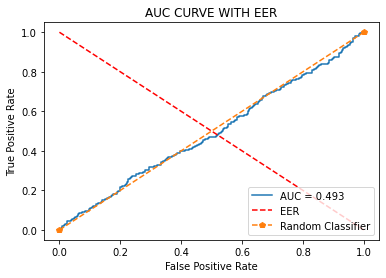

In [35]:
#y_pred_proba = clf.predict_proba(X_test)[::,1]
plt.title('AUC CURVE WITH EER')
fpr, tpr, _ = metrics.roc_curve(a,  b)
auc = metrics.roc_auc_score(a, b)
plt.plot(fpr,tpr,label = 'AUC = %0.3f' % auc) #"AUC=%0.2f' %"+str(auc)+ '%')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.plot([0, 1], [1, 0],'r--', label = 'EER')
plt.plot([0, 1], [0, 1],'p--', label = 'Random Classifier')
plt.legend(loc=4)
plt.show()

In [36]:
len(tpr)

494

In [37]:
eer = compute_eer(np.array(a),np.array(b))
eer

FRR:[0.    0.001 0.002 ... 0.998 0.999 1.   ], FAR:[1. 1. 1. ... 0. 0. 0.]


(0.495, 0.4934984165219334)

In [12]:
#True positive rate + False Positive Rate = 1 ЕДИНИЧКА ЗА ЕДИНИЧКУ + НОЛЬ ВМЕСТО ЕДИНИЧКИ
#TRUE NEGATIVE RATE + FALSE NEGATIVE RATE = 1

# EER - POINT WHERE FNR == FPR ==> WHERE TPR == TNR
# EER = 1% if FNR = 1 5 AND FPR =1%